In [6]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from typing import Union, Dict, Any, Tuple, List
import matplotlib.pyplot as plt
import json
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, roc_curve
)
import time
import datetime
import os
from decision_tree import DecisionTreeClassifier
from naive_bayes import NaiveBayesClassifier


In [7]:
def load_dataset_from_uci(id: int) -> Tuple[pd.DataFrame, Union[pd.DataFrame, pd.Series, np.ndarray]]:
    """
    Fetch a dataset from the UCI Machine Learning Repository by its ID.
    
    Parameters:
    id (int): The ID of the dataset to fetch.
    
    Returns:
    Tuple[pd.DataFrame, Union[pd.DataFrame, pd.Series, np.ndarray]]: A tuple containing the features as a DataFrame and the targets as a DataFrame, Series, or NumPy array.
    """
    repo = fetch_ucirepo(id=id)
    
    # Check if features and targets are None
    if repo.data.features is None:
        raise ValueError(f"Dataset {id}: Features data is None")
    if repo.data.targets is None:
        raise ValueError(f"Dataset {id}: Targets data is None")
    
    return repo.data.features, repo.data.targets


In [8]:
def load_datasets() -> Dict[str, int]:
    """
    Load dataset IDs from the datasets.json file.
    
    Returns:
    Dict[str, int]: Dictionary mapping dataset names to their UCI IDs.
    """
    with open('datasets.json', 'r') as f:
        return json.load(f)


In [9]:
datasets = load_datasets()

In [10]:
datasets

{'iris': 53,
 'heart_disease': 45,
 'wine_quality': 186,
 'breast_cancer': 17,
 'adult': 2,
 'bank_marketing': 222,
 'wine': 109,
 'mushroom': 73,
 'solar_flare': 89,
 'molecular_biology_splice_junction_gene_sequences': 69}

In [22]:
dataset_id = datasets['solar_flare']  # Example dataset ID, replace with desired dataset name
X, y = load_dataset_from_uci(dataset_id)

In [23]:
X

,modified Zurich class,largest spot size,spot distribution,activity,evolution,previous 24 hour flare activity,historically-complex,became complex on this pass,area,area of largest spot
0,C,S,O,1,2,1,1,2,1,2
1,D,S,O,1,3,1,1,2,1,2
2,C,S,O,1,3,1,1,2,1,1
3,D,S,O,1,3,1,1,2,1,2
4,D,A,O,1,3,1,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...
1384,H,S,X,1,2,1,1,1,1,1
1385,H,S,X,2,2,1,1,2,1,1
1386,C,S,O,1,2,1,2,2,1,1
1387,H,R,X,1,2,1,1,2,1,1


common flares      False
moderate flares    False
severe flares      False
dtype: bool

In [24]:
y.iloc[:,0].unique()


array([0, 1, 2, 5, 3, 8, 4, 6], dtype=int64)

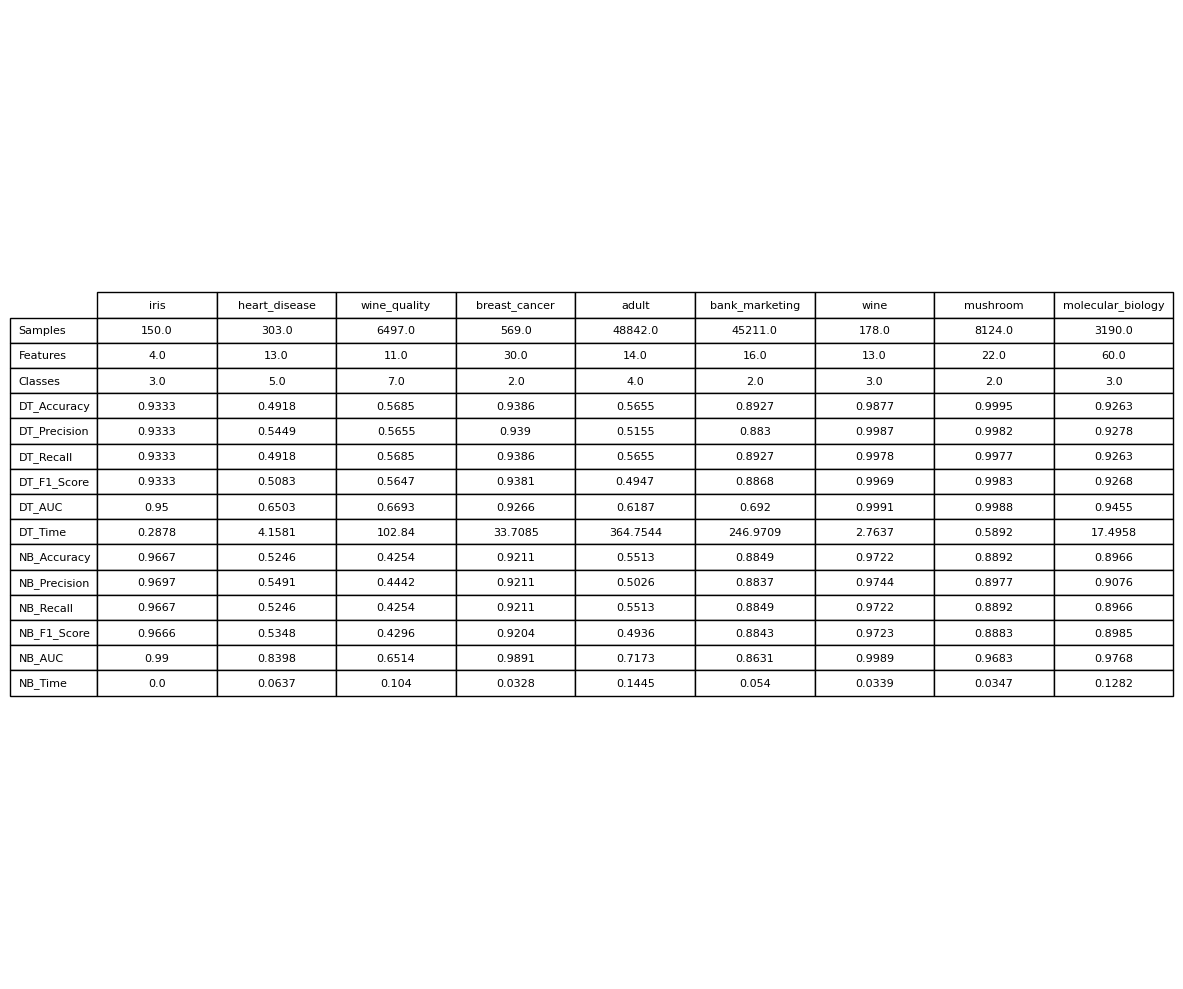

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data as dictionary
data = {
    "Dataset": [
        "iris", "heart_disease", "wine_quality", "breast_cancer", "adult",
        "bank_marketing", "wine", "mushroom", "molecular_biology"
    ],
    "Samples": [150, 303, 6497, 569, 48842, 45211, 178, 8124, 3190],
    "Features": [4, 13, 11, 30, 14, 16, 13, 22, 60],
    "Classes": [3, 5, 7, 2, 4, 2, 3, 2, 3],
    "DT_Accuracy": [0.933333, 0.491803, 0.568462, 0.938596, 0.565462, 0.892735, 0.987654, 0.999541, 0.926332],
    "DT_Precision": [0.933333, 0.544924, 0.565545, 0.939001, 0.515460, 0.882997, 0.998731, 0.998201, 0.927812],
    "DT_Recall": [0.933333, 0.491803, 0.568462, 0.938596, 0.565462, 0.892735, 0.997842, 0.997699, 0.926332],
    "DT_F1_Score": [0.933333, 0.508304, 0.564679, 0.938086, 0.494743, 0.886783, 0.996915, 0.998334, 0.926770],
    "DT_AUC": [0.950000, 0.650265, 0.669284, 0.926587, 0.618720, 0.692048, 0.999102, 0.998762, 0.945531],
    "DT_Time": [0.287766, 4.158082, 102.840014, 33.708472, 364.754428, 246.970942, 2.763712, 0.589239, 17.495794],
    "NB_Accuracy": [0.966667, 0.524590, 0.425385, 0.921053, 0.551336, 0.884883, 0.972222, 0.889231, 0.896552],
    "NB_Precision": [0.969697, 0.549063, 0.444220, 0.921134, 0.502612, 0.883708, 0.974359, 0.897697, 0.907557],
    "NB_Recall": [0.966667, 0.524590, 0.425385, 0.921053, 0.551336, 0.884883, 0.972222, 0.889231, 0.896552],
    "NB_F1_Score": [0.966583, 0.534832, 0.429556, 0.920396, 0.493645, 0.884285, 0.972263, 0.888293, 0.898540],
    "NB_AUC": [0.990000, 0.839809, 0.651440, 0.989087, 0.717263, 0.863051, 0.998903, 0.968316, 0.976830],
    "NB_Time": [0.000000, 0.063726, 0.103981, 0.032799, 0.144477, 0.053978, 0.033855, 0.034729, 0.128213]
}

# Load into DataFrame
df = pd.DataFrame(data)

# Transpose the DataFrame to vertical view
df_transposed = df.set_index("Dataset").T

# Plot the transposed DataFrame
fig, ax = plt.subplots(figsize=(12, 10))
ax.axis('off')  # Hide axes

# Create the table
table = ax.table(
    cellText=df_transposed.round(4).values,
    rowLabels=df_transposed.index,
    colLabels=df_transposed.columns,
    loc='center',
    cellLoc='center',
    colLoc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.2, 1.2)

# Save the figure as an image
plt.tight_layout()
plt.savefig("vertical_comparison_table.png", dpi=300, bbox_inches='tight')
plt.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Ensure output folder exists
os.makedirs("dataset_tables", exist_ok=True)

# Original data
data = {
    "Dataset": [
        "iris", "heart_disease", "wine_quality", "breast_cancer", "adult",
        "bank_marketing", "wine", "mushroom", "molecular_biology"
    ],
    "Samples": [150, 303, 6497, 569, 48842, 45211, 178, 8124, 3190],
    "Features": [4, 13, 11, 30, 14, 16, 13, 22, 60],
    "Classes": [3, 5, 7, 2, 4, 2, 3, 2, 3],
    "DT_Accuracy": [0.933333, 0.491803, 0.568462, 0.938596, 0.565462, 0.892735, 0.987654, 0.999541, 0.926332],
    "DT_Precision": [0.933333, 0.544924, 0.565545, 0.939001, 0.515460, 0.882997, 0.998731, 0.998201, 0.927812],
    "DT_Recall": [0.933333, 0.491803, 0.568462, 0.938596, 0.565462, 0.892735, 0.997842, 0.997699, 0.926332],
    "DT_F1_Score": [0.933333, 0.508304, 0.564679, 0.938086, 0.494743, 0.886783, 0.996915, 0.998334, 0.926770],
    "DT_AUC": [0.950000, 0.650265, 0.669284, 0.926587, 0.618720, 0.692048, 0.999102, 0.998762, 0.945531],
    "DT_Time": [0.287766, 4.158082, 102.840014, 33.708472, 364.754428, 246.970942, 2.763712, 0.589239, 17.495794],
    "NB_Accuracy": [0.966667, 0.524590, 0.425385, 0.921053, 0.551336, 0.884883, 0.972222, 0.889231, 0.896552],
    "NB_Precision": [0.969697, 0.549063, 0.444220, 0.921134, 0.502612, 0.883708, 0.974359, 0.897697, 0.907557],
    "NB_Recall": [0.966667, 0.524590, 0.425385, 0.921053, 0.551336, 0.884883, 0.972222, 0.889231, 0.896552],
    "NB_F1_Score": [0.966583, 0.534832, 0.429556, 0.920396, 0.493645, 0.884285, 0.972263, 0.888293, 0.898540],
    "NB_AUC": [0.990000, 0.839809, 0.651440, 0.989087, 0.717263, 0.863051, 0.998903, 0.968316, 0.976830],
    "NB_Time": [0.000000, 0.063726, 0.103981, 0.032799, 0.144477, 0.053978, 0.033855, 0.034729, 0.128213]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Metrics to compare
metrics = [
    "Accuracy", "Precision", "Recall", "F1_Score", "AUC", "Time"
]

# Loop through each dataset and create table
for idx, row in df.iterrows():
    dataset_name = row["Dataset"]
    
    table_data = {
        "Metric": metrics,
        "Decision Tree": [
            row["DT_Accuracy"],
            row["DT_Precision"],
            row["DT_Recall"],
            row["DT_F1_Score"],
            row["DT_AUC"],
            row["DT_Time"]
        ],
        "Naive Bayes": [
            row["NB_Accuracy"],
            row["NB_Precision"],
            row["NB_Recall"],
            row["NB_F1_Score"],
            row["NB_AUC"],
            row["NB_Time"]
        ]
    }

    df_metric = pd.DataFrame(table_data)
    
    # Plotting
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.axis('off')
    table = ax.table(
        cellText=df_metric.round(4).values,
        colLabels=df_metric.columns,
        loc='center',
        cellLoc='center',
        colLoc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)

    plt.title(f"Performance Comparison: {dataset_name}", fontsize=12, pad=10)
    plt.tight_layout()
    plt.savefig(f"dataset_tables/{dataset_name}_comparison.png", dpi=300, bbox_inches='tight')
    plt.close()

print("✅ All tables saved in the 'dataset_tables' folder.")


✅ All tables saved in the 'dataset_tables' folder.
